<a href="https://colab.research.google.com/github/aakashkumara/deep-learning-projects/blob/main/facemaskdetectionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# confuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [4]:
# extracting the compossed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3170.jpg', 'with_mask_2712.jpg', 'with_mask_2857.jpg', 'with_mask_2385.jpg', 'with_mask_3223.jpg']
['with_mask_687.jpg', 'with_mask_2290.jpg', 'with_mask_318.jpg', 'with_mask_1934.jpg', 'with_mask_637.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1819.jpg', 'without_mask_2215.jpg', 'without_mask_3509.jpg', 'without_mask_307.jpg', 'without_mask_1121.jpg']
['without_mask_2753.jpg', 'without_mask_1601.jpg', 'without_mask_1392.jpg', 'without_mask_2640.jpg', 'without_mask_3562.jpg']


In [8]:
print("number of with mask images:", len(with_mask_files))
print("number of without mask images:", len(without_mask_files))

number of with mask images: 3725
number of without mask images: 3828


In [9]:
# create the a labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


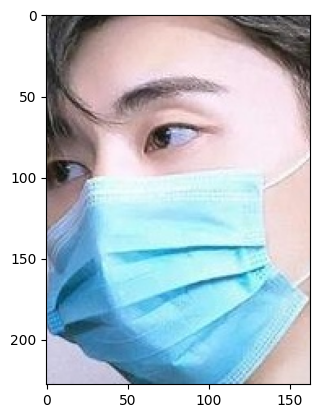

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

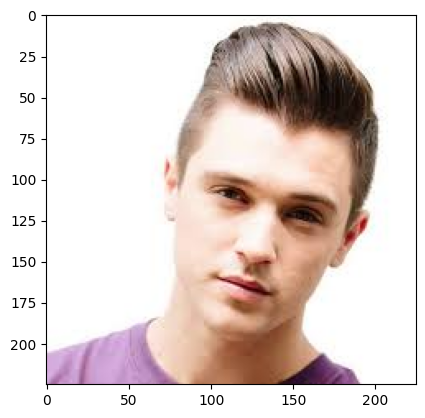

In [17]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2825.jpg')
imgplot = plt.imshow(img)
plt.show()

In [18]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'



for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [19]:
type(data)

list

In [20]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
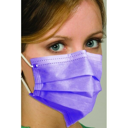

In [21]:
data[0]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
# converting image list and label list to numpy arrays

X = np.array(data)
y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(y)

numpy.ndarray

In [27]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(y)

[1 1 1 ... 0 0 0]


In [29]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [31]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[ 51,  68,  93],
        [ 50,  67,  91],
        [ 48,  65,  89],
        ...,
        [187, 183, 180],
        [186, 182, 179],
        [186, 182, 179]],

       [[ 54,  69,  93],
        [ 55,  70,  93],
        [ 51,  66,  89],
        ...,
        [188, 185, 181],
        [188, 184, 180],
        [188, 184, 180]],

       [[ 54,  67,  89],
        [ 55,  68,  90],
        [ 52,  66,  87],
        ...,
        [189, 186, 179],
        [188, 185, 178],
        [187, 184, 177]],

       ...,

       [[ 20,  24,  33],
        [ 21,  25,  34],
        [ 23,  27,  36],
        ...,
        [ 37,  51,  89],
        [ 39,  53,  90],
        [ 40,  54,  88]],

       [[ 21,  25,  34],
        [ 23,  27,  36],
        [ 22,  26,  35],
        ...,
        [ 36,  50,  89],
        [ 36,  50,  89],
        [ 39,  53,  89]],

       [[ 21,  24,  31],
        [ 24,  28,  34],
        [ 24,  27,  35],
        ...,
        [ 39,  53,  89],
        [ 41,  55,  91],
        [ 41,  54,  88]]], dtype=uint8)
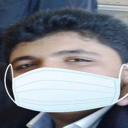

In [32]:
X_train[0]

In [33]:
X_train_scaled[0]

array([[[0.2       , 0.26666667, 0.36470588],
        [0.19607843, 0.2627451 , 0.35686275],
        [0.18823529, 0.25490196, 0.34901961],
        ...,
        [0.73333333, 0.71764706, 0.70588235],
        [0.72941176, 0.71372549, 0.70196078],
        [0.72941176, 0.71372549, 0.70196078]],

       [[0.21176471, 0.27058824, 0.36470588],
        [0.21568627, 0.2745098 , 0.36470588],
        [0.2       , 0.25882353, 0.34901961],
        ...,
        [0.7372549 , 0.7254902 , 0.70980392],
        [0.7372549 , 0.72156863, 0.70588235],
        [0.7372549 , 0.72156863, 0.70588235]],

       [[0.21176471, 0.2627451 , 0.34901961],
        [0.21568627, 0.26666667, 0.35294118],
        [0.20392157, 0.25882353, 0.34117647],
        ...,
        [0.74117647, 0.72941176, 0.70196078],
        [0.7372549 , 0.7254902 , 0.69803922],
        [0.73333333, 0.72156863, 0.69411765]],

       ...,

       [[0.07843137, 0.09411765, 0.12941176],
        [0.08235294, 0.09803922, 0.13333333],
        [0.09019608, 0

In [34]:
import tensorflow as tf
from tensorflow import keras


In [58]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [59]:
# compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [60]:
# traing the neural network

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - acc: 0.7010 - loss: 0.6425 - val_acc: 0.8545 - val_loss: 0.3363
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - acc: 0.8813 - loss: 0.2877 - val_acc: 0.8975 - val_loss: 0.2584
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - acc: 0.8991 - loss: 0.2499 - val_acc: 0.8909 - val_loss: 0.2286
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - acc: 0.9213 - loss: 0.2110 - val_acc: 0.8942 - val_loss: 0.2178
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - acc: 0.9355 - loss: 0.1624 - val_acc: 0.9207 - val_loss: 0.2117


In [61]:
# model evalution

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9256 - loss: 0.2178
Test Accuracy = 0.9205824136734009


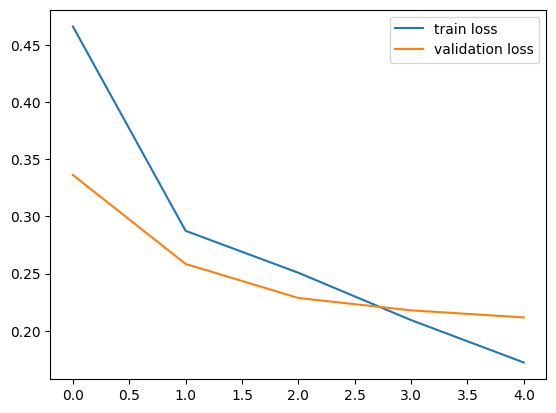

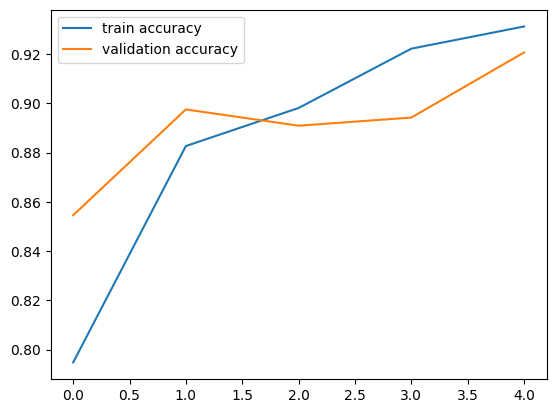

In [62]:
h = history

# plot the loss value

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Enter the image path: /content/test.webp


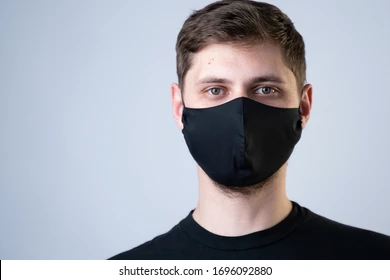

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
[[0.01207863 0.95530546]]
1
The person in the image is wearing mask


In [63]:
input_image_path = input('Enter the image path: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing mask')

Enter the image path: /content/tesi.jpeg


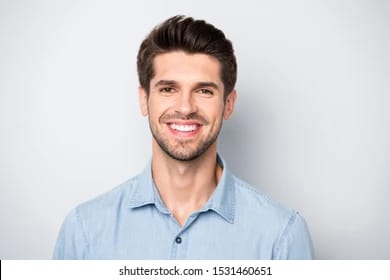

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.53887284 0.4617822 ]]
0
The person in the image is not wearing mask


In [66]:
input_image_path = input('Enter the image path: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing mask')